A notebook to check the CMEMS climatology velocity direction and magnitude

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import os
import glob

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [3]:
data_dir='/home/soontiensn/remote2/hank/climatology/glorys12/seasonal/'
seasons = ['DJF', 'MAM', 'JJA', 'SON']
files = {season: glob.glob(os.path.join(data_dir,'*{}*.nc'.format(season) ))[0] for season in seasons}
print(files)

{'DJF': '/home/soontiensn/remote2/hank/climatology/glorys12/seasonal/mercatorglorys12v1_gl12_mean_DJF_1994-2018.nc', 'MAM': '/home/soontiensn/remote2/hank/climatology/glorys12/seasonal/mercatorglorys12v1_gl12_mean_MAM_1994-2018.nc', 'JJA': '/home/soontiensn/remote2/hank/climatology/glorys12/seasonal/mercatorglorys12v1_gl12_mean_JJA_1994-2018.nc', 'SON': '/home/soontiensn/remote2/hank/climatology/glorys12/seasonal/mercatorglorys12v1_gl12_mean_SON_1994-2018.nc'}


In [38]:
lat_min=35
lon_min=-80
lat_max=60
lon_max=-30

In [57]:
def plot_quivers(ax, xvel,yvel,lat,lon,st=10):
    bmap = Basemap(projection='merc',llcrnrlon=lon_min, urcrnrlon=lon_max,
                   llcrnrlat=lat_min,urcrnrlat=lat_max, ax=ax,resolution='i')
    bmap.drawcoastlines()
    bmap.fillcontinents(color='grey',)
    bmap.drawparallels(np.arange(lat_min, lat_max, 5.))
    bmap.drawmeridians(np.arange(lon_min, lon_max,5.))
    mag = np.sqrt(xvel**2+yvel**2)
    mesh=bmap.pcolormesh(lon,lat,mag,latlon=True,vmin=0,vmax=1,cmap='YlGnBu_r')
    q=bmap.quiver(lon[::st,::st],lat[::st,::st],xvel[::st,::st],yvel[::st,::st],latlon=True,scale=10,color='lightgrey')
    ax.quiverkey(q,0.05,0.2,0.5,'0.5 m/s',color='lightgrey')
    cbar=plt.colorbar(mesh, ax=ax)
    cbar.set_label('speed [m/s]')

# Surface

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/p

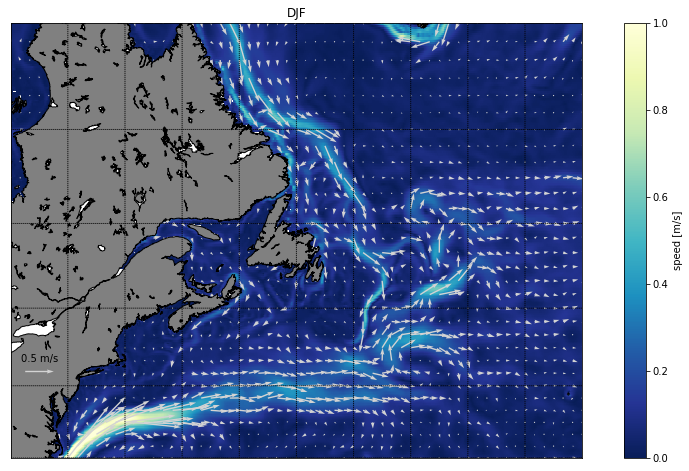

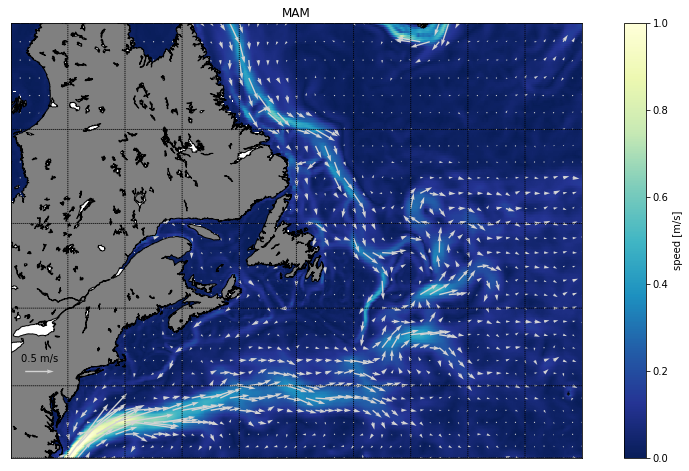

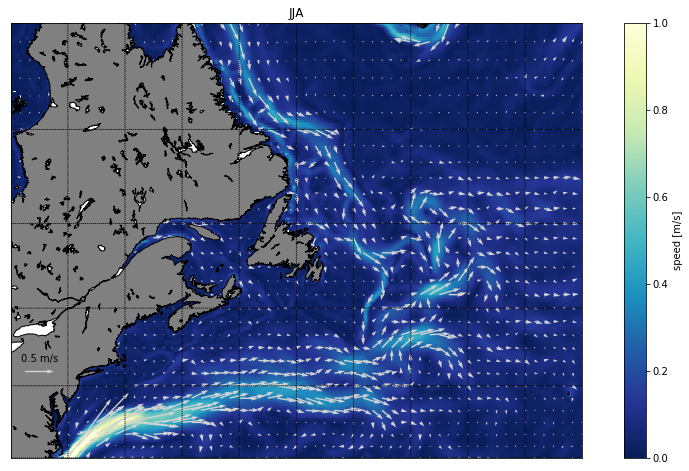

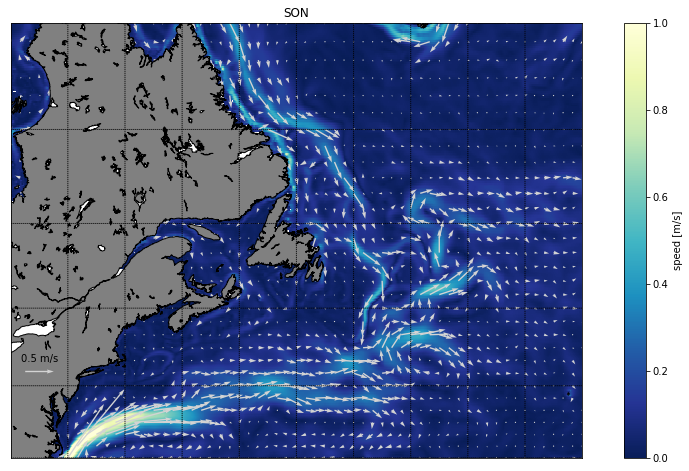

In [59]:
for season in seasons:
    fig, ax = plt.subplots(1,1,figsize=(15,8))
    d = xr.open_dataset(files[season])
    dsel=d.sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min,lon_max)).isel(depth=0)
    lons,lats = np.meshgrid(dsel.longitude.values, dsel.latitude.values)
    plot_quivers(ax, dsel.uo.values[0], dsel.vo.values[0,...], lats, lons)
    ax.set_title(season)

# Bottom

In [63]:
def bottom_data(var):
    """Ocean navigator's algorithm for identyifing the bottom velocity by looking at where masking starts"""
    reshaped = np.ma.masked_invalid(var.reshape(var.shape[0],-1))
    edges = np.array(np.ma.notmasked_edges(reshaped,axis=0))
    depths = edges[1,0,:]
    indices=edges[1,1,:]
    data = np.ma.MaskedArray(np.zeros(var.shape[1:]),mask=True,dtype=var.dtype)
    data[np.unravel_index(indices,data.shape)]=reshaped[depths,indices]
    return data

/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/soontiensn/miniconda/envs/analysis/lib/p

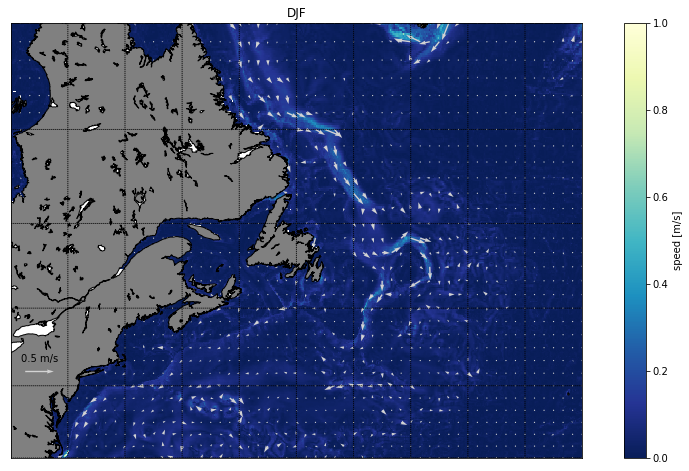

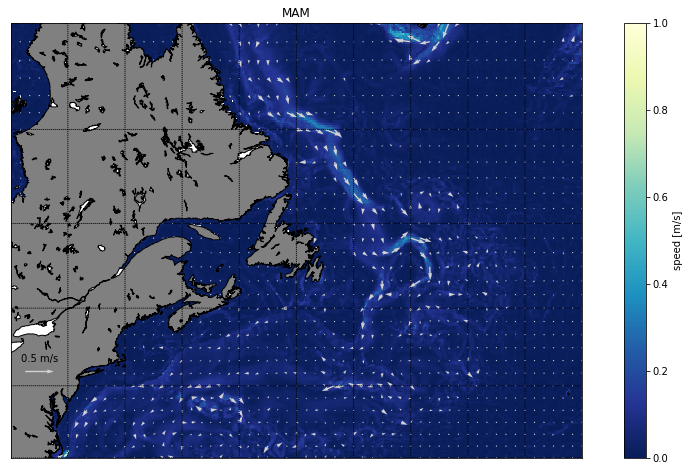

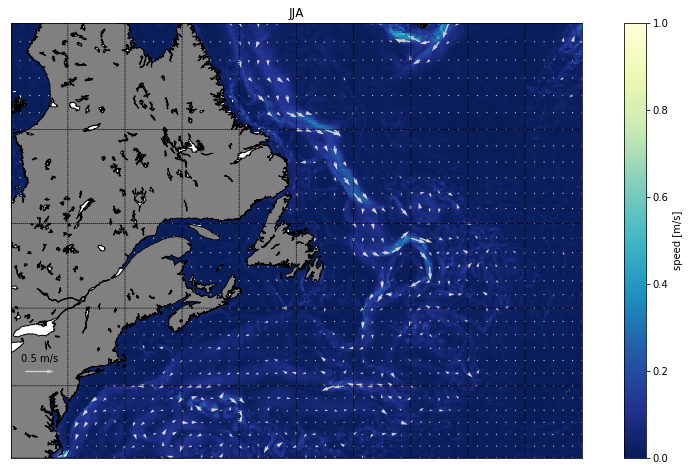

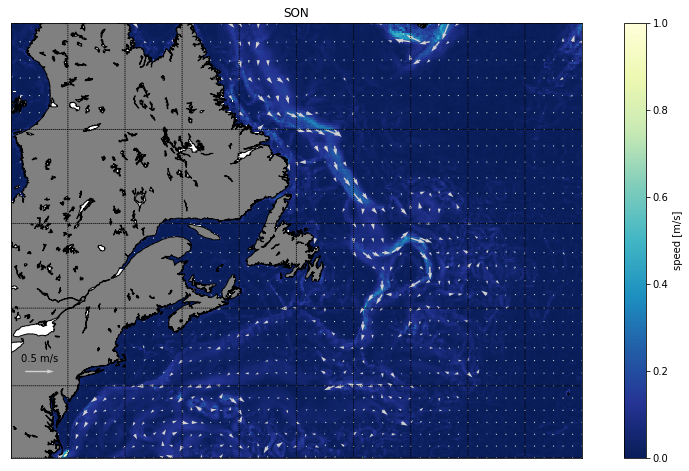

In [64]:
for season in seasons:
    fig, ax = plt.subplots(1,1,figsize=(15,8))
    d = xr.open_dataset(files[season])
    dsel=d.sel(latitude=slice(lat_min,lat_max), longitude=slice(lon_min,lon_max))
    lons,lats = np.meshgrid(dsel.longitude.values, dsel.latitude.values)
    uo_bottom = bottom_data(dsel.uo.values[0])
    vo_bottom = bottom_data(dsel.vo.values[0])
    plot_quivers(ax,uo_bottom, vo_bottom, lats, lons)
    ax.set_title(season)